The following example shows how to train a model. Get a list of training data csv file in the selected folder. Lessons learned so far:
- Training result is very sensitive to normalization. The normalization approach based on mean and variance does not work very well. Still need to manually set mean and variance.
- t-sne plot of adapter trace is an important flag of training result. 
- h net does not have to descent because phi net training strives to make it rise, while h net training itself tries to lower the loss
- Increase the h training frequency to fight against rising h 
- Increase alpha to push domain info to adapter
- Increase number of features to minimize MSE loss.
- ocassional small spike in cross entropy loss is possibly a sign that phi net become further domain invariant and may not be bad.
- at the late stage of training while both mse loss and cross entropy loss converge. May need to train h net every step to refine the optimization direction.

Existing problem:
- The more classes, the harder to train. The difficulty comes from instability of loss_f and loss_c. alpha is hard to tune.
- t-sne gets worse as epoch grows and the cross entropy loss remains the same. 

In [1]:
import os
import matplotlib.pyplot as plt

import trainer

current_dir = os.getcwd()
# subfolder = "wind_near_wall_wo_bemt_in_control_train_x_only_wind"
subfolder = "wind_near_wall_wo_bemt_in_control_train_z_only_wind"
# subfolder = "wind_near_wall_wo_bemt_in_control_train_xz_wind"
# subfolder = "training_back2back"
folder_path = os.path.join(os.path.dirname(current_dir), "data", "training", subfolder)
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Filter out files that do not end with .csv
file_names = [f for f in file_names if f.endswith('.csv')]
# add subfolder to the file names
data_list = [os.path.join(subfolder, f) for f in file_names]
for data in data_list:
    print(data)

path1 = os.path.join(subfolder, "input_label_map_disturbance_force_label.yaml")
path2 = os.path.join(subfolder, "column_map.yaml")

wind_near_wall_wo_bemt_in_control_train_z_only_wind\test_wind_near_wall_x0_0_y0_0_z0_0_d0_5_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_train_z_only_wind\test_wind_near_wall_x0_0_y0_0_z3_0_d0_5_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_train_z_only_wind\test_wind_near_wall_x0_0_y0_0_z5_0_d0_5_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_train_z_only_wind\test_wind_near_wall_x0_0_y0_0_zn3_0_d0_5_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_train_z_only_wind\test_wind_near_wall_x0_0_y0_0_zn5_0_d0_5_train_no_bemt.csv


- Make sure the input_label_map_disturbance_force_label.yaml is in the selected folder. This yaml defines which fields are model inputs and which fields are data labels. 
- Make sure the column_map.yaml is in the selected folder. This yaml maps data fields to the corresponding column in the csv files. This file can be auto-generated by `Simulation\simulation\training_data_user_guide.ipynb`
- If this is the first time to train on this data. The script will normalize the data and save the normalization parameters into a file.

Loading normalization params file from
..\data\training\wind_near_wall_wo_bemt_in_control_train_z_only_wind\normalization_params.yaml
[1] loss_f: 1.21 loss_c: 1.72
[101] loss_f: 0.18 loss_c: 1.68
phi_out: tensor([[ 2.5227, -0.2319,  0.1944,  1.0000],
        [ 2.5313, -0.2306,  0.1931,  1.0000],
        [ 2.5398, -0.2293,  0.1919,  1.0000],
        ...,
        [ 2.8614, -0.2213,  0.2727,  1.0000],
        [ 2.8594, -0.2218,  0.2735,  1.0000],
        [ 2.8571, -0.2224,  0.2743,  1.0000]])
a = tensor([[-0.5862,  0.7607, -0.5176],
        [ 3.1413, -4.5689,  5.9231],
        [ 1.2361, -2.0812, -1.9517],
        [ 1.9706, -2.5127,  3.6220]])
RMS: [0.18183433 0.15920834 0.60097199]
phi_out: tensor([[ 2.5221, -0.2315,  0.1933,  1.0000],
        [ 2.5412, -0.2286,  0.1906,  1.0000],
        [ 2.5599, -0.2258,  0.1880,  1.0000],
        ...,
        [ 2.9712, -0.2087,  0.2672,  1.0000],
        [ 2.9694, -0.2093,  0.2680,  1.0000],
        [ 2.9673, -0.2098,  0.2688,  1.0000]])
a = tensor([[

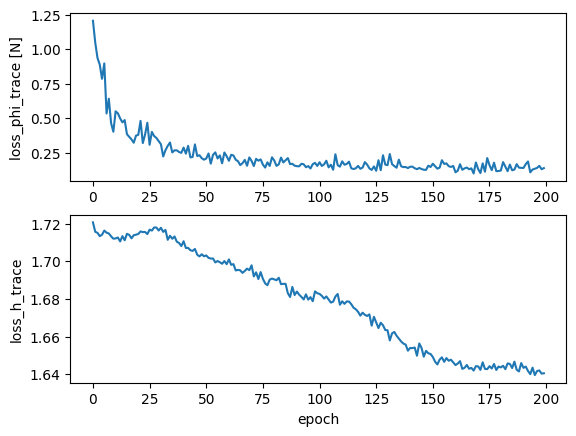

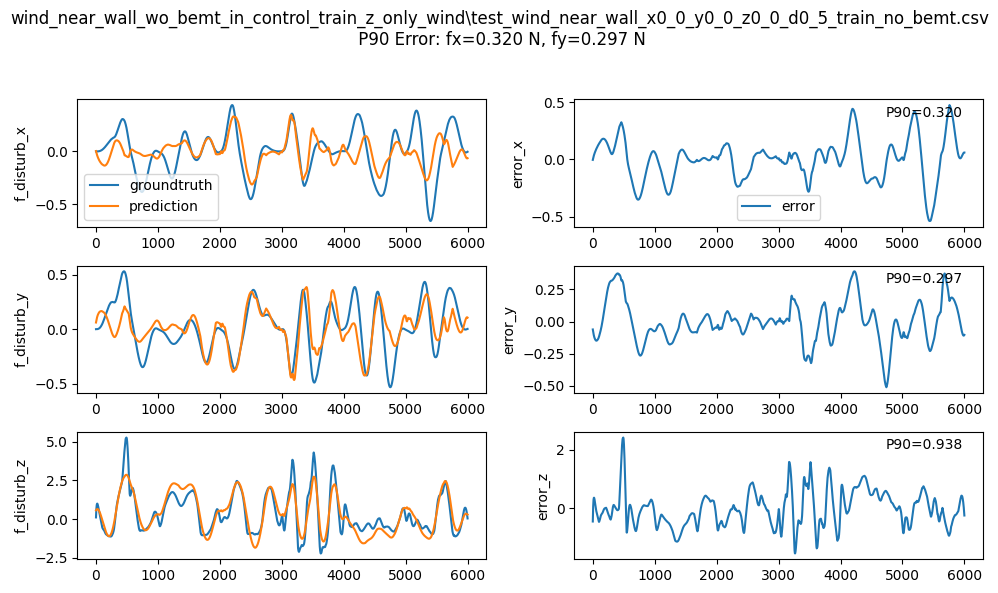

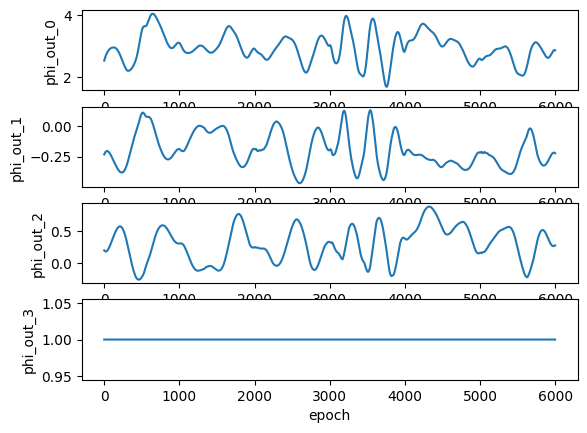

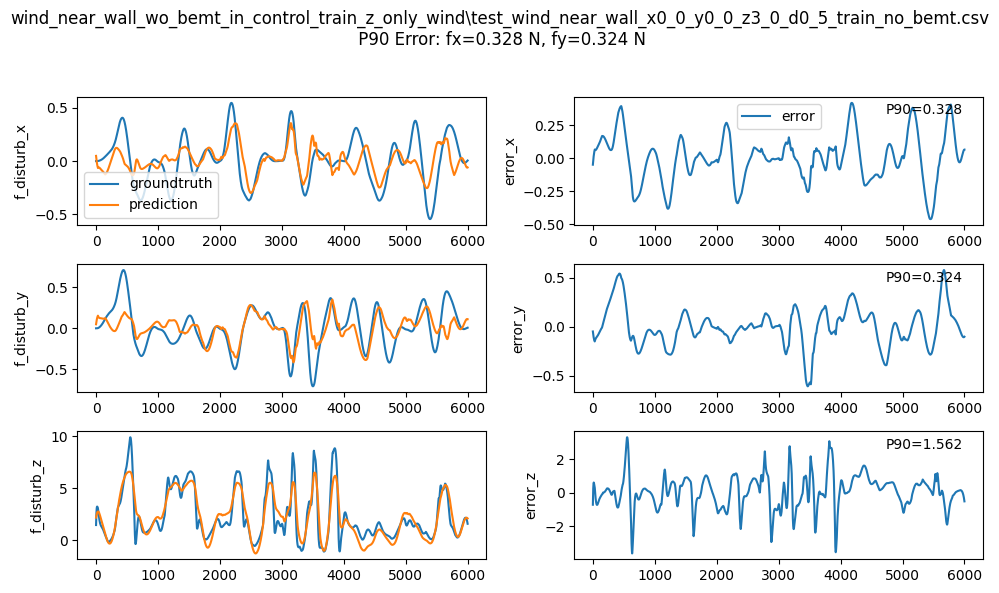

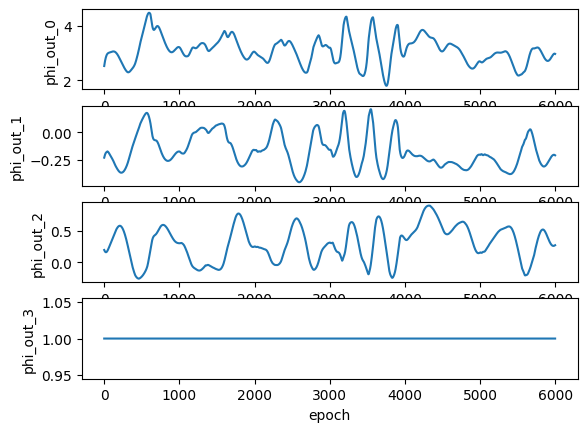

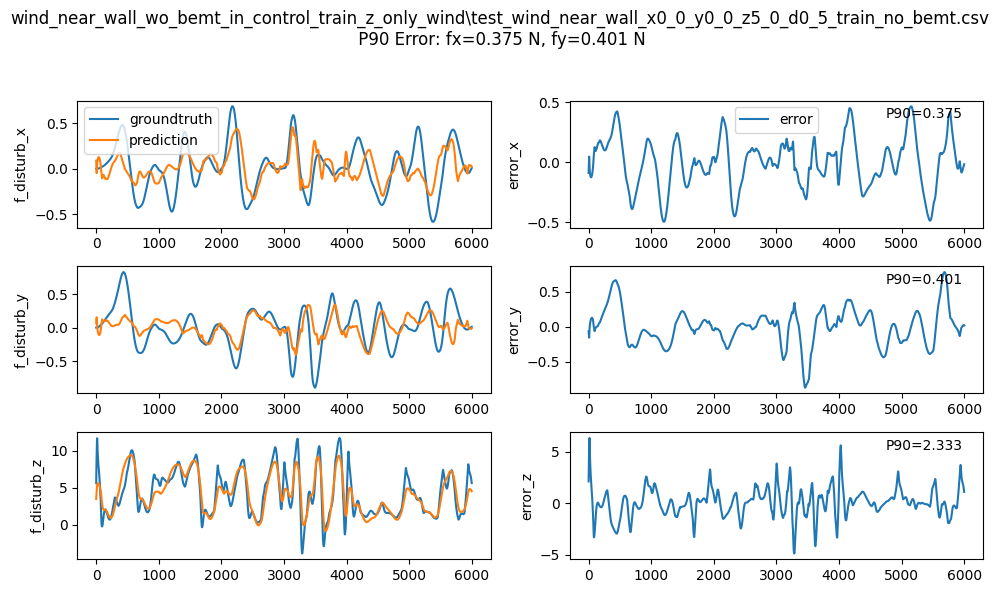

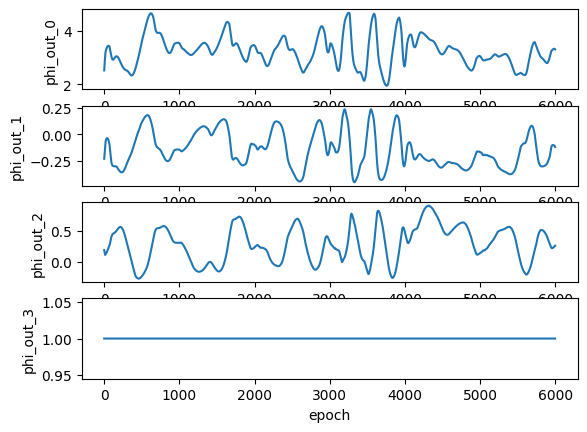

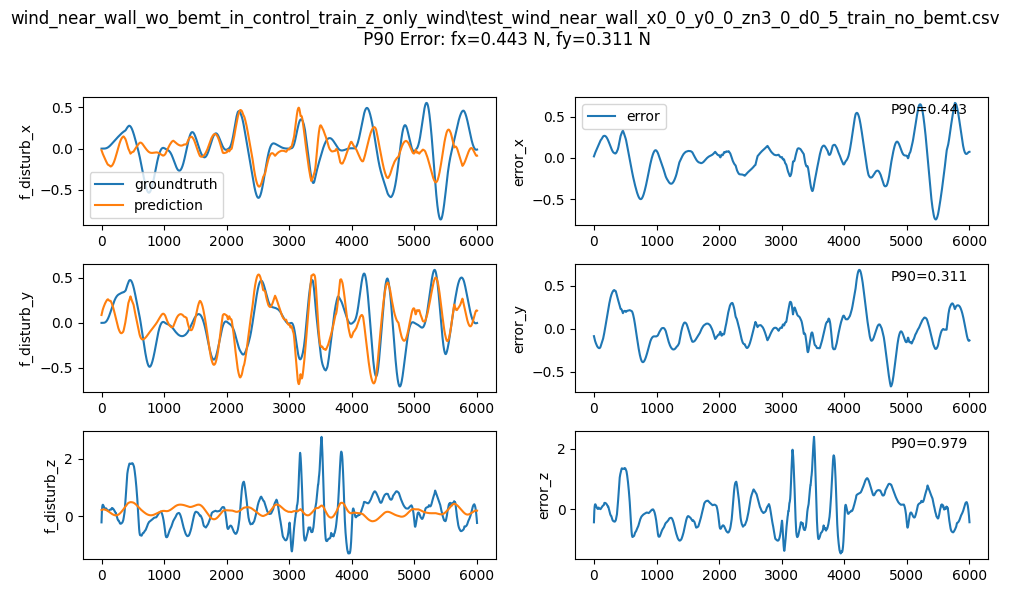

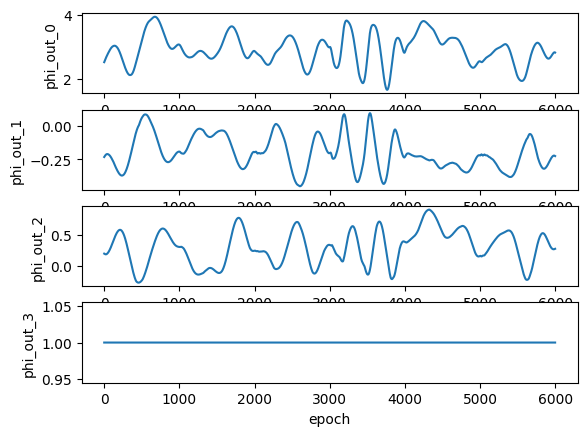

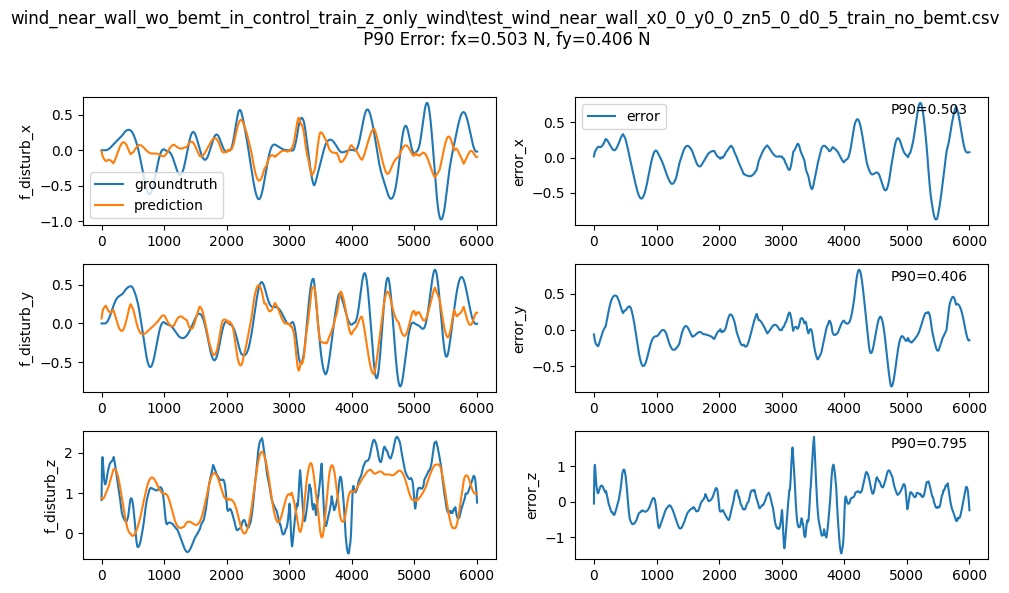

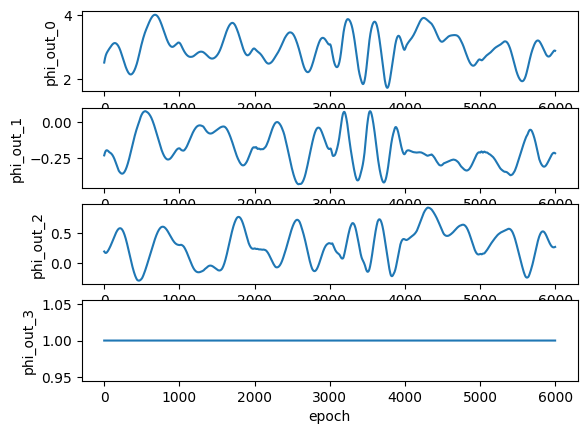

In [2]:
# use the data from previous section to train the model
can_skip_io_normalizaiton = False
trainer_instance = trainer.Trainer(
    data_menu=data_list,
    input_label_map_file=path1,
    column_map_file=path2,
    can_skip_io_normalizaiton=can_skip_io_normalizaiton
)
# trainer_instance = trainer.Trainer(data_list[:4], path1, path2)   # use small data list for quick testing
trainer_instance.train_model()
trainer_instance.plot_loss()
is_x_y = True
trainer_instance.verify_model(data_list, is_x_y)


plt.show()  

After training, we can save the model in the following way.

In [3]:
model_name = subfolder
trainer_instance.save_model(model_name)

Model saved to model\wind_near_wall_wo_bemt_in_control_train_z_only_wind.pth


Model validation.

wind_near_wall_validation_no_bemt\test_wind_near_wall_x0_0_y0_0_zn10_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_x0_0_y0_0_zn1_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_x0_0_y0_0_zn4_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_xn2_0_y0_0_zn10_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_xn2_0_y0_0_zn1_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_xn2_0_y0_0_zn4_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_xn5_0_y0_0_zn10_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_xn5_0_y0_0_zn1_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_xn5_0_y0_0_zn4_0_d0_5_validation_no_bemt.csv
Loading normalization params file from
..\data\training\wind_near_wall_validation_no_bemt\normalization_param

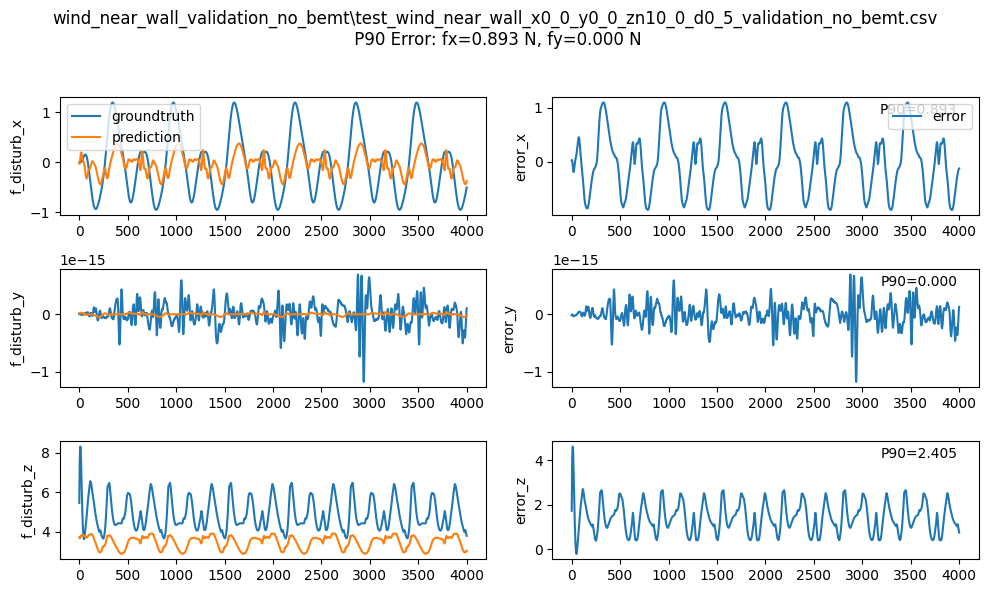

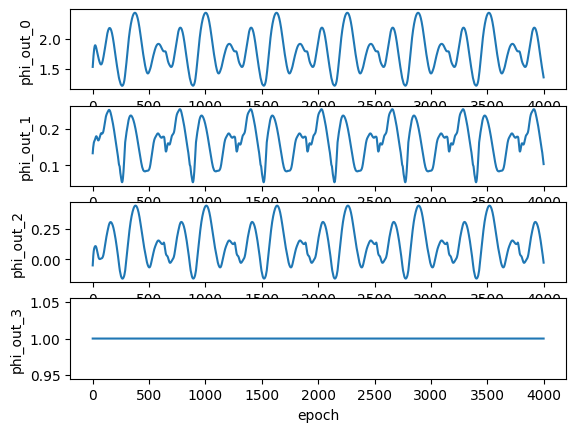

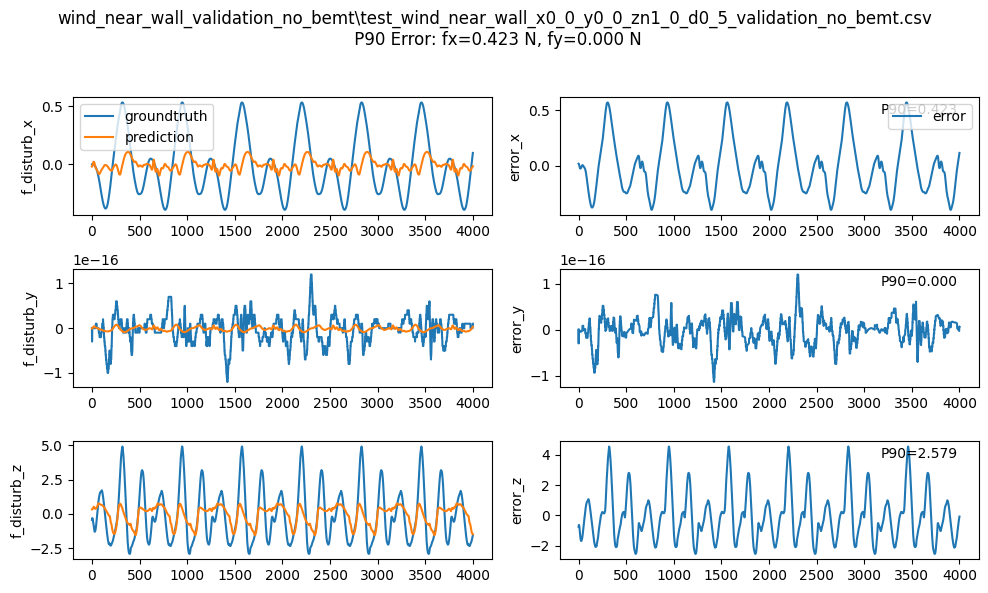

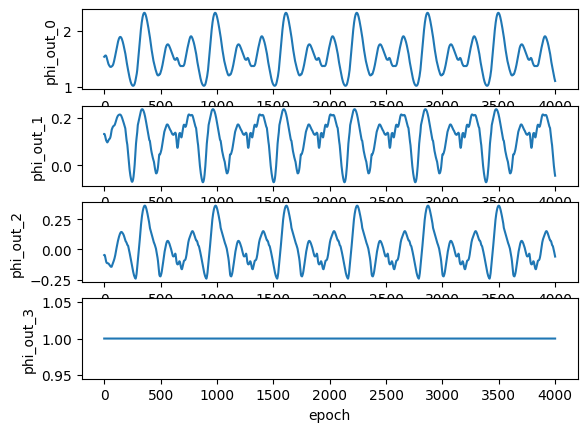

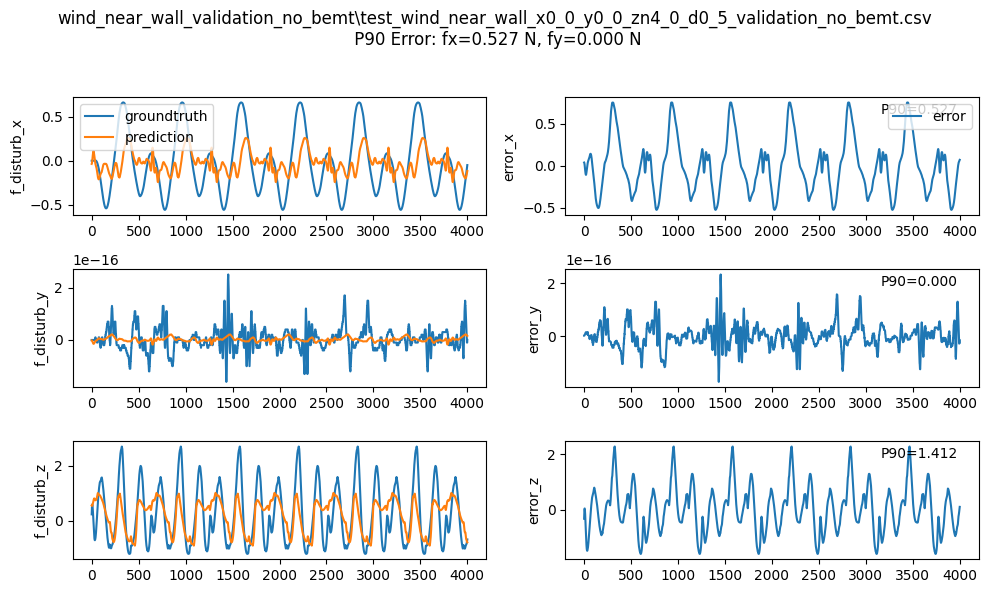

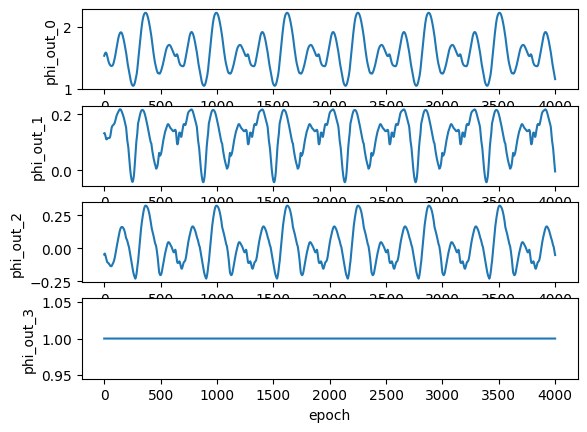

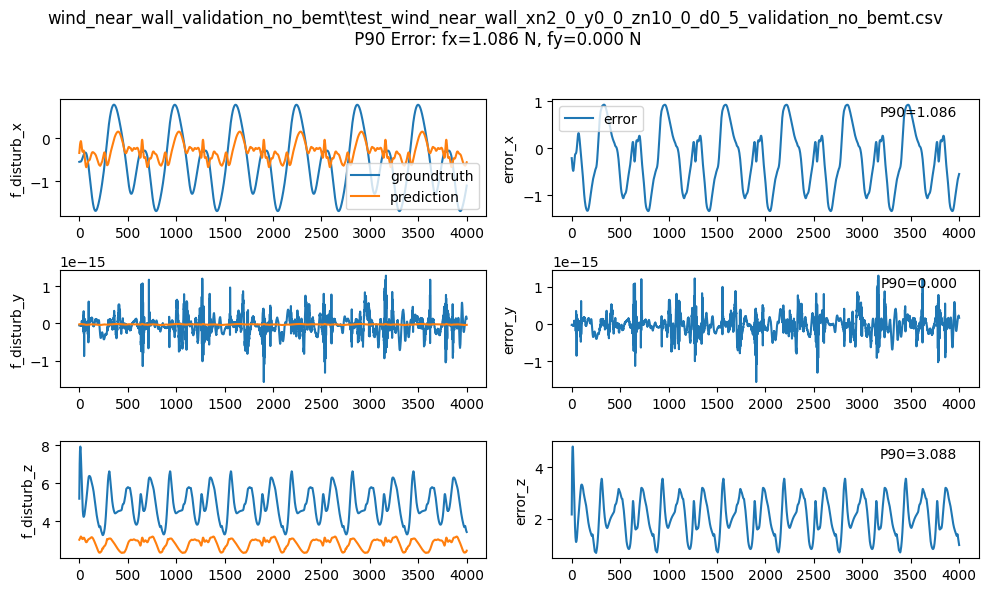

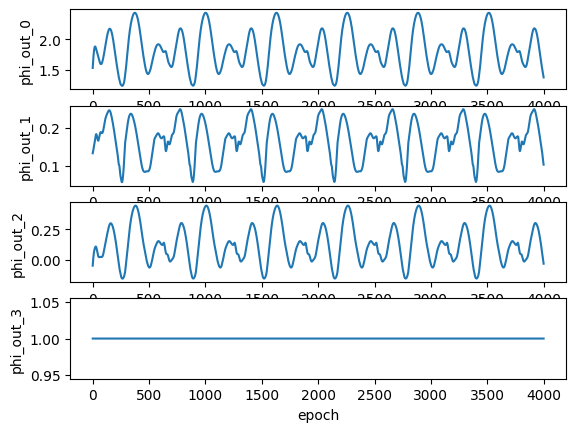

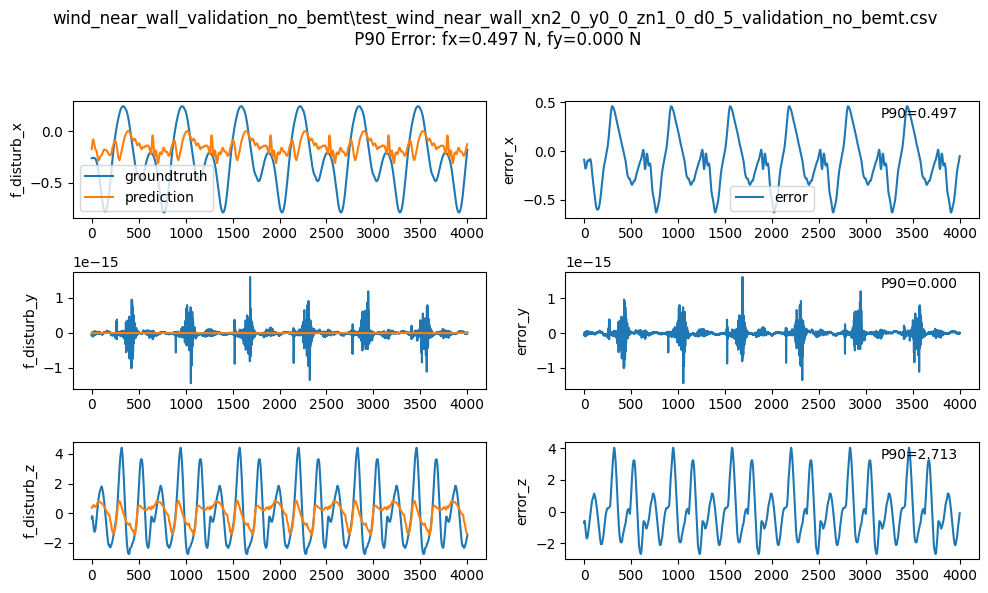

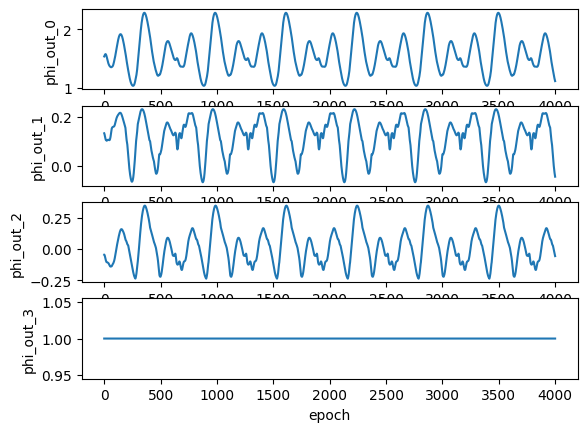

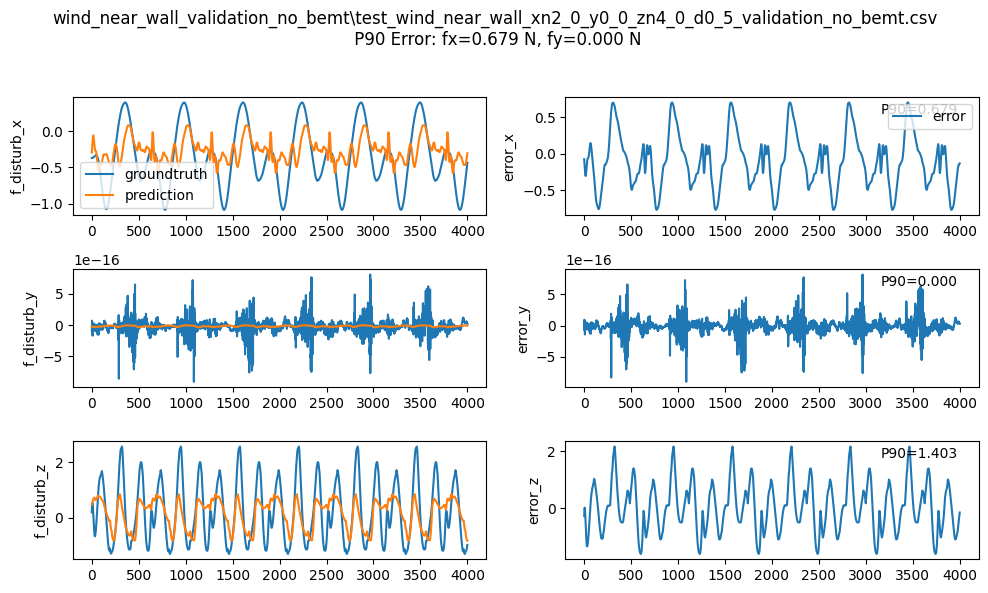

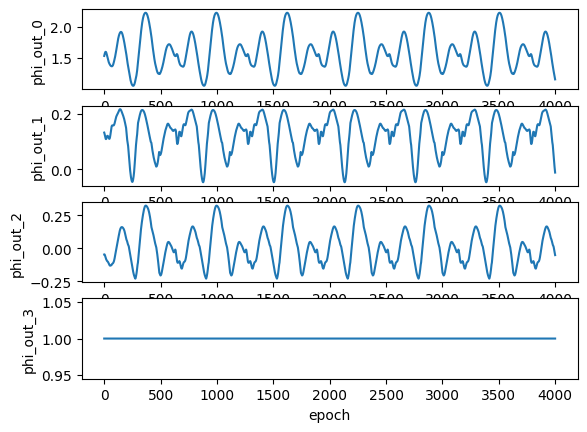

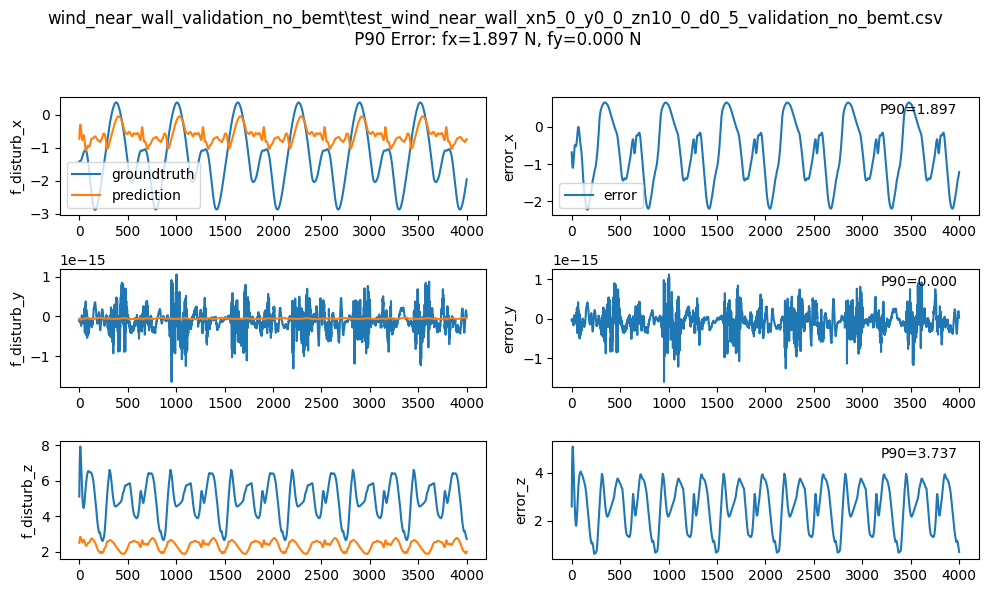

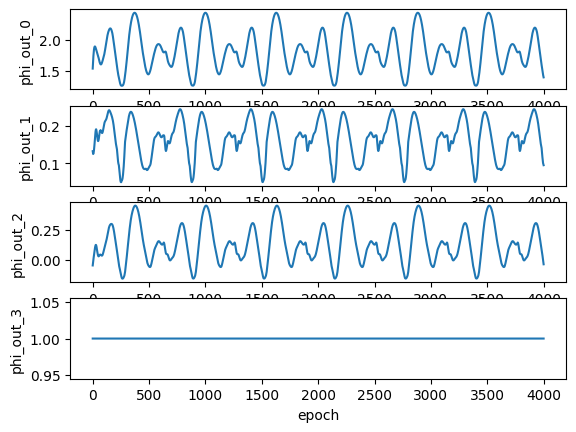

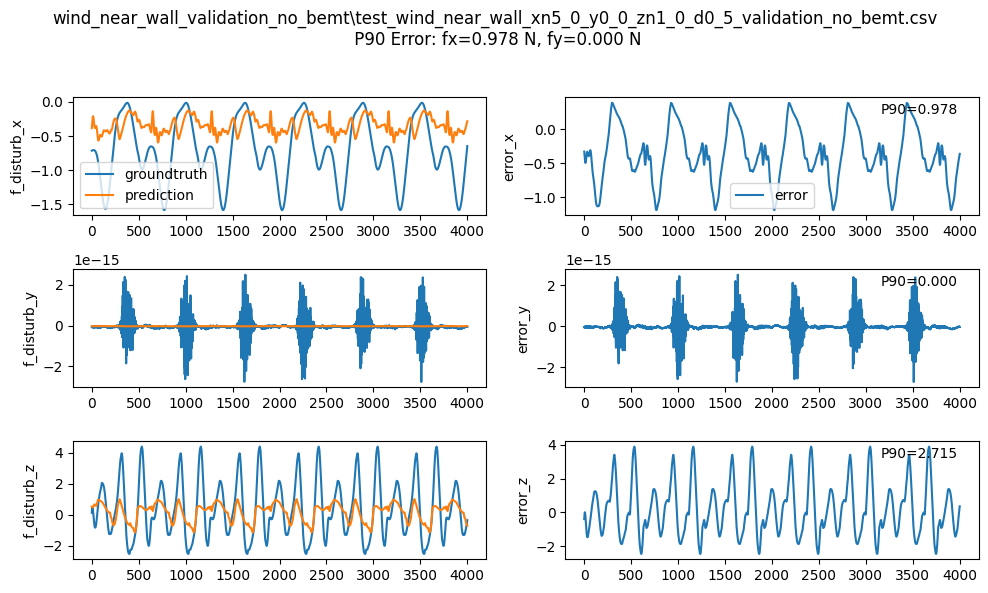

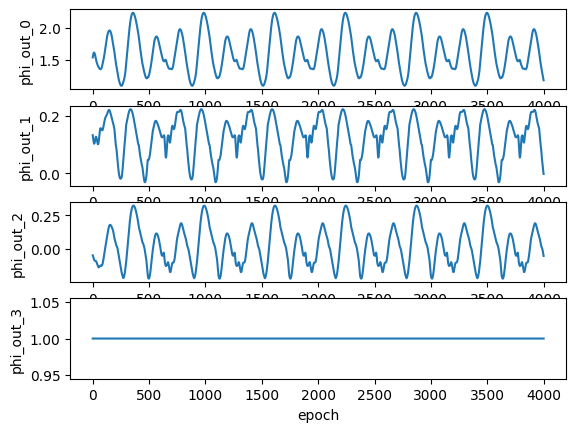

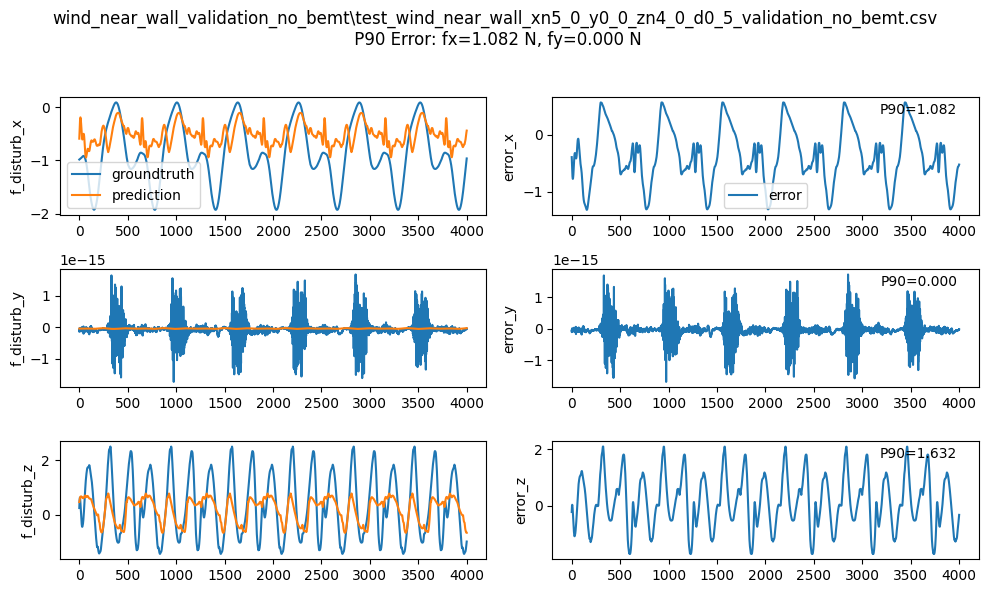

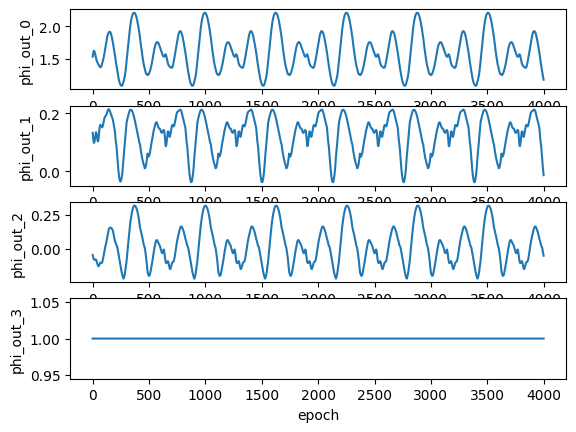

phi net input output fields:
input ['position_x', 'position_y', 'position_z', 'q_0', 'q_1', 'q_2', 'q_3', 'v_x', 'v_y', 'v_z', 'omega_x', 'omega_y', 'omega_z', 'f_ctrl_input_z', 'torque_ctrl_input_x', 'torque_ctrl_input_y', 'torque_ctrl_input_z', 'rotor_0_rotation_spd', 'rotor_1_rotation_spd', 'rotor_2_rotation_spd', 'rotor_3_rotation_spd']
label ['f_disturb_x', 'f_disturb_y', 'f_disturb_z']


In [4]:
import os
import matplotlib.pyplot as plt

import trainer

current_dir = os.getcwd()
subfolder = "wind_near_wall_validation_no_bemt"
folder_path = os.path.join(os.path.dirname(current_dir), "data", "training", subfolder)
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Filter out files that do not end with .csv
file_names = [f for f in file_names if f.endswith('.csv')]
# add subfolder to the file names
data_list = [os.path.join(subfolder, f) for f in file_names]
for data in data_list:
    print(data)

path1 = os.path.join(subfolder, "input_label_map_disturbance_force_label.yaml")
path2 = os.path.join(subfolder, "column_map.yaml")


# model_name = subfolder


phi, h, config = trainer.load_model(model_name)
# make a new trainer to replicate the above setup, just to allow verify_model to work
trainer_for_verification = trainer.Trainer(data_list, path1, path2, True)
trainer_for_verification.phi_net = phi
trainer_for_verification.h_net = h
trainer_for_verification.verify_model(data_list, is_x_y)
plt.show()  

print("phi net input output fields:")
for key, value in config["phi_net_io_fields"].items():
    print(key, value)


Inspect data in the data list.

In [5]:
# trainer_instance.inspect_data(data_list[:2])

Inspect t-sne of a_trace.

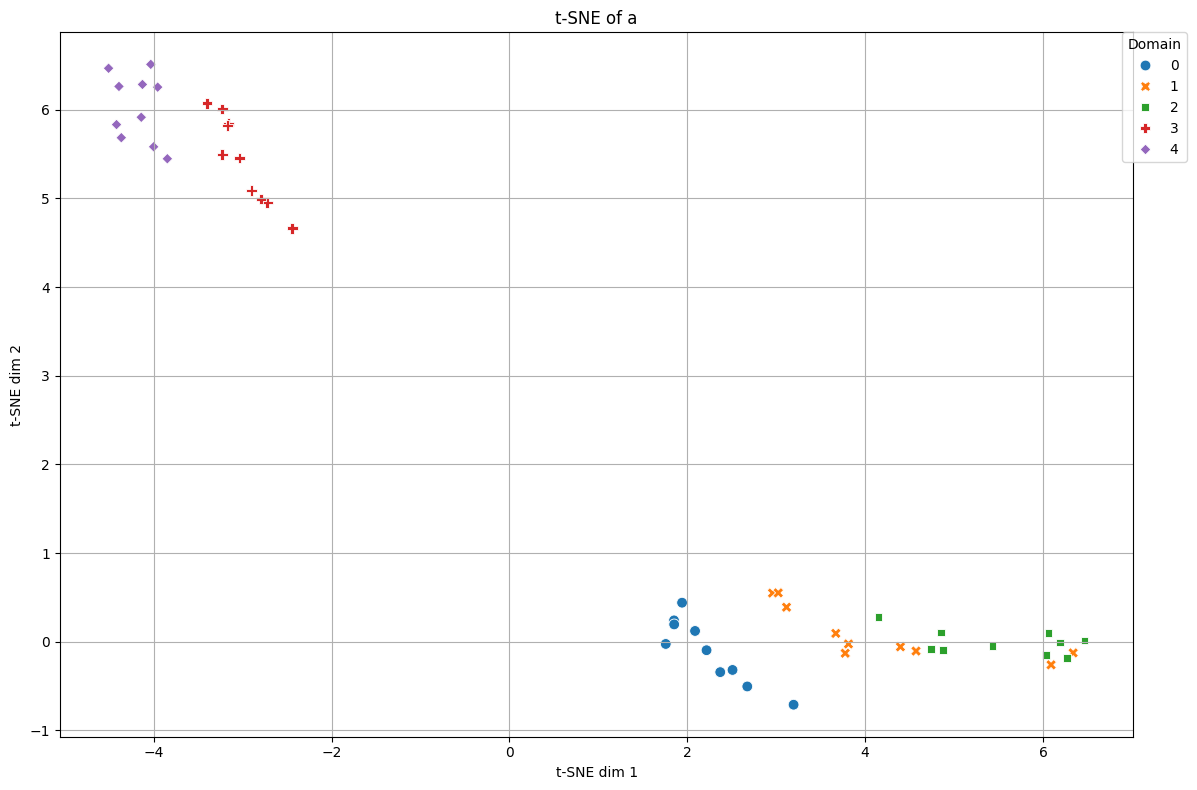

In [6]:
import performance_analyzer
n = 170
performance_analyzer.plot_tsne_of_a(trainer_instance.a_trace, list(range(n, n + 10)))
plt.show()  

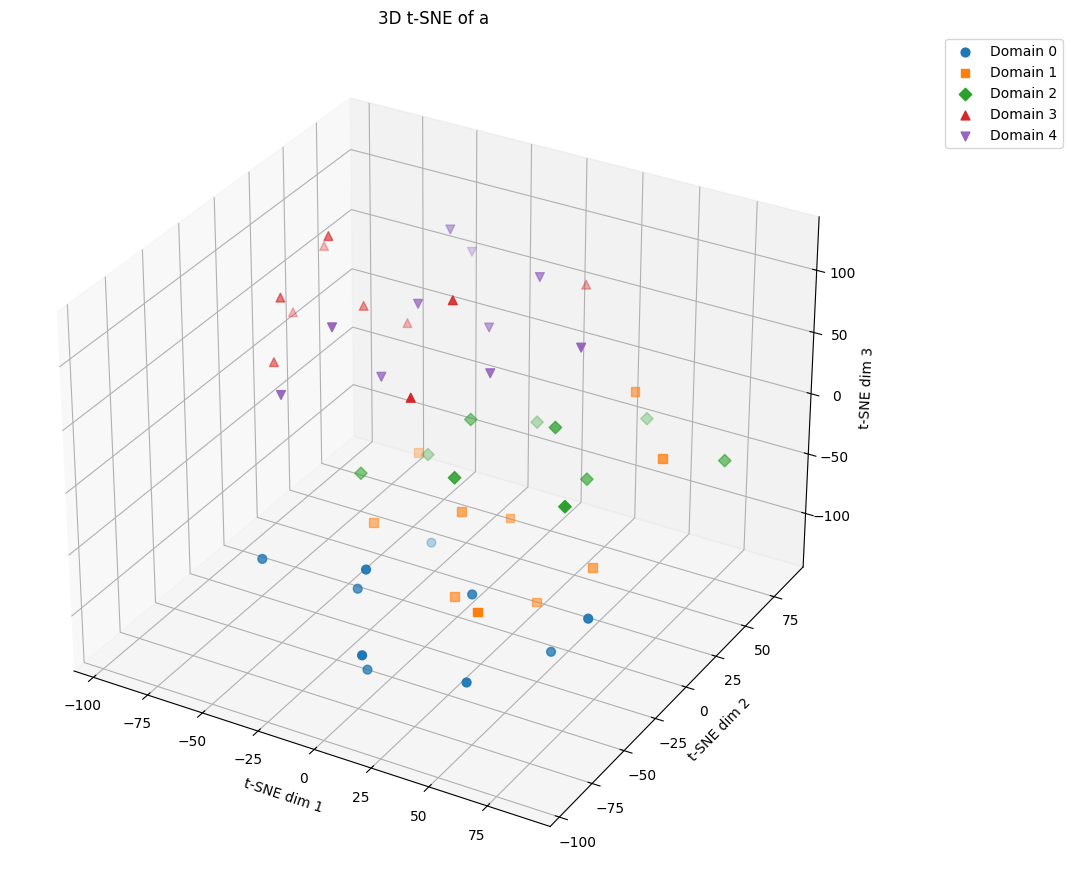

In [7]:
import performance_analyzer
# %matplotlib tk
n = 150
performance_analyzer.plot_tsne_3d_of_a(trainer_instance.a_trace, list(range(n, n + 10)))
